# How outliers affect scaling

ToDo:
- check how outlier affect predictions with different predictors

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
# init random array with numbers between 1 and 100, len=20
arr = np.random.randint(low=1, high=100, size=20)

In [3]:
# to dataframe, drop double index columns
df = pd.DataFrame(arr)
df = df.rename(columns={0:'data'})
df.head(3)

,data
0,47
1,72
2,37


In [4]:
df.shape

(20, 1)

In [5]:
# non zero/nan instances
df.data.isnull().sum()

0

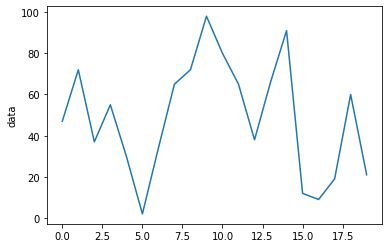

In [6]:
# unscaled - y-axis regular scale
_ = sns.lineplot(y=df.data, x=range(0,df.shape[0]))

In [7]:
# init minmaxscaler
mms = MinMaxScaler()
df_mm = mms.fit_transform(df)

In [8]:
# scaled transform to dataframe with some cometics
scaled = pd.DataFrame(df_mm).reset_index()
scaled.drop('index',axis=1,inplace=True)
scaled = scaled.rename(columns={0:'data'})
scaled.head(3)

,data
0,0.468750
1,0.729167
2,0.364583


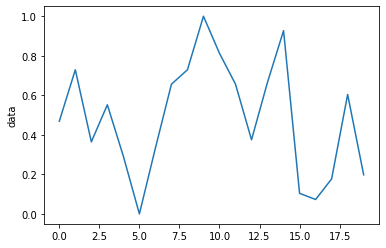

In [9]:
# scaled plot
_ = sns.lineplot(y=scaled.data, x=range(0, df.shape[0]))

In [10]:
# add outlier to initial dataset
df_out = df
df_out.loc[len(df)] = 1000#*1000
df_out.tail(3)

,data
18,60
19,21
20,1000


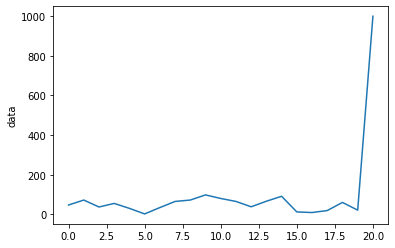

In [11]:
# outlier plot
sns.lineplot(y=df_out.data, x=range(0, df.shape[0]))

In [12]:
# scale outlier dataframe
out_mm = mms.fit_transform(df_out)

In [13]:
out_scaled = pd.DataFrame(out_mm).reset_index()#.describe()
out_scaled.drop('index',axis=1,inplace=True)
out_scaled = out_scaled.rename(columns={0:'data'})
out_scaled.tail(1)

,data
20,1.0


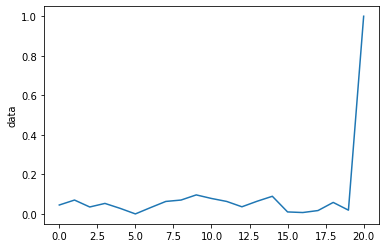

In [14]:
# scaled plot
sns.lineplot(y=out_scaled.data, x=range(0, df.shape[0]))

# StandardScaler

In [15]:
# init standardscaler
sts = StandardScaler()
df_sts = sts.fit_transform(df)

In [16]:
# scaled transform to dataframe with some cometics

# omit outlier added before
sts_scaled = pd.DataFrame(df_sts[:-1]).reset_index()
sts_scaled.drop('index',axis=1,inplace=True)
sts_scaled = sts_scaled.rename(columns={0:'data'})
sts_scaled.describe()

,data
count,20.000000
mean,-0.221704
std,0.136847
min,-0.450004
25%,-0.323986
50%,-0.210204
75%,-0.129455
max,0.019809


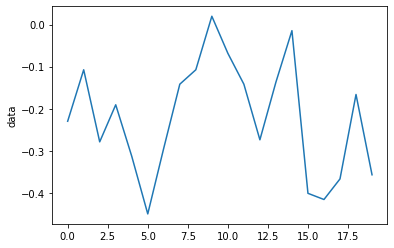

In [17]:
# unscaled - y-axis regular scale
_ = sns.lineplot(y=sts_scaled.data, x=range(0,sts_scaled.shape[0]))

# With Outlier

In [18]:
# init standardscaler
sts = StandardScaler()
df_sts = sts.fit_transform(df)

In [19]:
# scaled transform to dataframe with some cometics

# include outlier added before
sts_scaled = pd.DataFrame(df_sts).reset_index()
sts_scaled.drop('index',axis=1,inplace=True)
sts_scaled = sts_scaled.rename(columns={0:'data'})
sts_scaled.describe()

,data
count,21.000000
mean,0.000000
std,1.024695
min,-0.450004
25%,-0.312975
50%,-0.190628
75%,-0.107432
max,4.434087


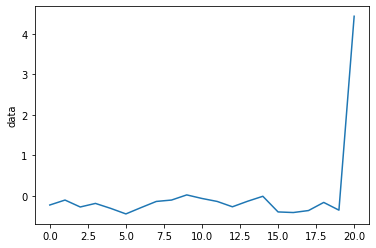

In [20]:
# unscaled - y-axis regular scale
_ = sns.lineplot(y=sts_scaled.data, x=range(0,sts_scaled.shape[0]))